In [16]:
import numpy as np
from scipy.stats import binom
from scipy.stats import beta
import seaborn as sns
import matplotlib.pyplot as plt
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(9.5,5)})

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        n = kwargs['n'] # This is the number of Bernoili trials.
        k = kwargs['k'] # This is the number of 'successes'.
        a = kwargs['a'] # This is the parameter alpha for the prior Beta distribution
        b = kwargs['b'] # This is the parameter beta for the prior Beta distribution
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
                    
    else:
        print('Distribution type not supported.')    

a_prime = 120.
b_prime = 282.


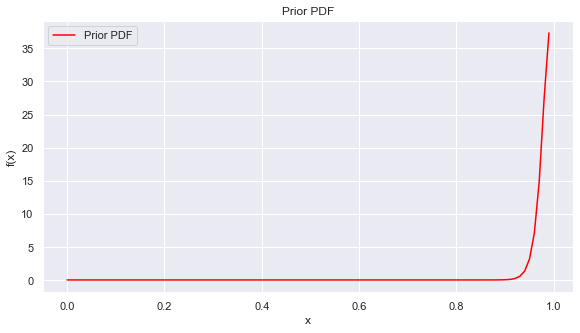

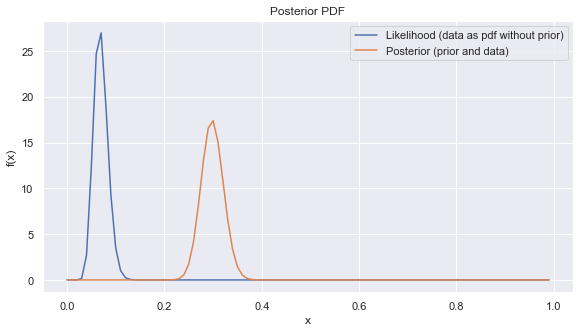

In [27]:
x = np.arange(0, 1, 0.01)
Prior, Likelihood, Posterior = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=300, # number of trials in data
    k=20, # number of succeses in data
    a=100, # number of successes in prior
    b=2)  # number of failures in prior
# See: https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb
# Also see: https://math.mit.edu/~dav/05.dir/class15-prep.pdf

ax1 = sns.lineplot(x=x, y=Prior, color='red', label='Prior')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

scale = 100/np.sum(Likelihood)
ax2 = sns.lineplot(x=x, y=Likelihood*scale, label='Likelihood (data as pdf without prior)')
ax2 = sns.lineplot(x=x, y=Posterior, label='Posterior (prior and data)')
ax2.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend();
plt.show()